# Support Vector Regression (SVR) — Theory & Interview Q&A

Support Vector Regression is a supervised learning algorithm that uses the principles of SVM to predict continuous outcomes, fitting a function within a margin of tolerance.

| Aspect                | Details                                                                 |
|-----------------------|------------------------------------------------------------------------|
| **Definition**        | Predicts continuous values using SVM principles, fits within a margin.  |
| **Equation**          | f(x) = w·x + b, with ε-insensitive loss                                 |
| **Use Cases**         | Stock price prediction, time series, engineering                        |
| **Assumptions**       | Data can be separated with a margin, kernel trick for non-linear        |
| **Pros**              | Robust to outliers, flexible with kernels, controls error margin        |
| **Cons**              | Slow for large datasets, sensitive to parameter tuning                  |
| **Key Parameters**    | Kernel, C (regularization), epsilon, gamma                             |
| **Evaluation Metrics**| MSE, RMSE, R² Score                                                     |

## Interview Q&A

**Q1: What is the ε-insensitive loss in SVR?**  
A: Errors within ε are ignored; only larger errors are penalized.

**Q2: What does the parameter C control?**  
A: The trade-off between margin width and error tolerance.

**Q3: How do you choose epsilon?**  
A: Based on the acceptable error margin for your application.

**Q4: What is the kernel trick in SVR?**  
A: It allows SVR to fit non-linear functions by mapping data to higher dimensions.

**Q5: When should you use SVR?**  
A: For regression tasks with complex, non-linear relationships.

**Q6: How do you evaluate SVR performance?**  
A: Using metrics like MSE, RMSE, and R² score.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline

In [2]:
data = fetch_california_housing()
data

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [3]:
data.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [4]:
data.target_names

['MedHouseVal']

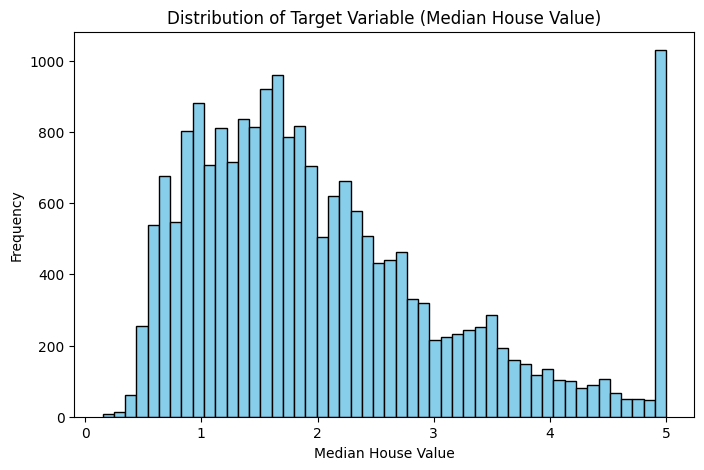

In [5]:
# Plot histogram of the target variable (Median House Value)
plt.figure(figsize=(8, 5))
plt.hist(data.target, bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.title('Distribution of Target Variable (Median House Value)')
plt.show()

In [6]:
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name="MedHouseVal") ## Why series? -> A Series is a one-dimensional labeled array capable of holding any data type. It is similar to a column in a DataFrame.

X.shape, y.shape

((20640, 8), (20640,))

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, train_size=0.2)

In [8]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Ensures all features have equal influence
    ('svr', SVR())
])

In [9]:
## Hyperparameter
param_grid ={
    'svr__kernel':['rbf'],
    'svr__C': [1,10,100],
    'svr__gamma':['scale',0.1,0.01],
    'svr__epsilon':[0.1,0.2,0.5]

}

In [10]:
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

,estimator,"Pipeline(step...svr', SVR())])"
,param_grid,"{'svr__C': [1, 10, ...], 'svr__epsilon': [0.1, 0.2, ...], 'svr__gamma': ['scale', 0.1, ...], 'svr__kernel': ['rbf']}"
,scoring,'r2'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,copy,True


In [11]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

Best Parameters: {'svr__C': 10, 'svr__epsilon': 0.2, 'svr__gamma': 'scale', 'svr__kernel': 'rbf'}
R² Score: 0.7481834821362913
RMSE: 0.5782703797349797


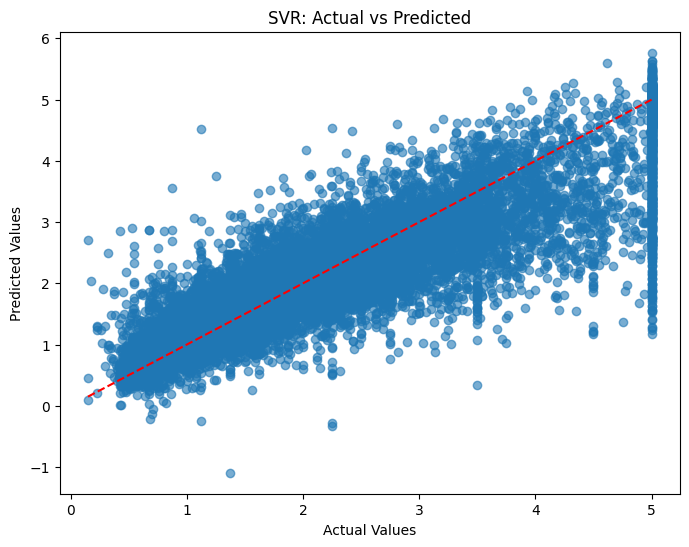

In [12]:
print("Best Parameters:", grid_search.best_params_)
print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

# 7️⃣ Visualization
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("SVR: Actual vs Predicted")
plt.show()

In [13]:
## Proper Code:

# 1️⃣ Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

# 2️⃣ Load dataset
# Using California Housing dataset — continuous target is suitable for regression
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# 3️⃣ Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4️⃣ Build Pipeline
# SVR is sensitive to feature scales → scaling is mandatory for stable performance
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Ensures all features have equal influence
    ('svr', SVR())
])

# 5️⃣ Hyperparameter tuning with cross-validation
# C: Regularization strength → higher = less regularization
# gamma: Kernel coefficient (in RBF kernel) → controls influence range
# epsilon: Margin where no penalty is given to errors
param_grid = {
    'svr__kernel': ['rbf'],
    'svr__C': [1, 10, 100],
    'svr__gamma': ['scale', 0.1, 0.01],
    'svr__epsilon': [0.1, 0.2, 0.5]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

# 6️⃣ Best model evaluation
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("Best Parameters:", grid_search.best_params_)
print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

# 7️⃣ Visualization
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("SVR: Actual vs Predicted")
plt.show()


KeyboardInterrupt: 